Confusion Matrix:
[[127  70]
 [ 69  34]]
Accuracy: 0.54


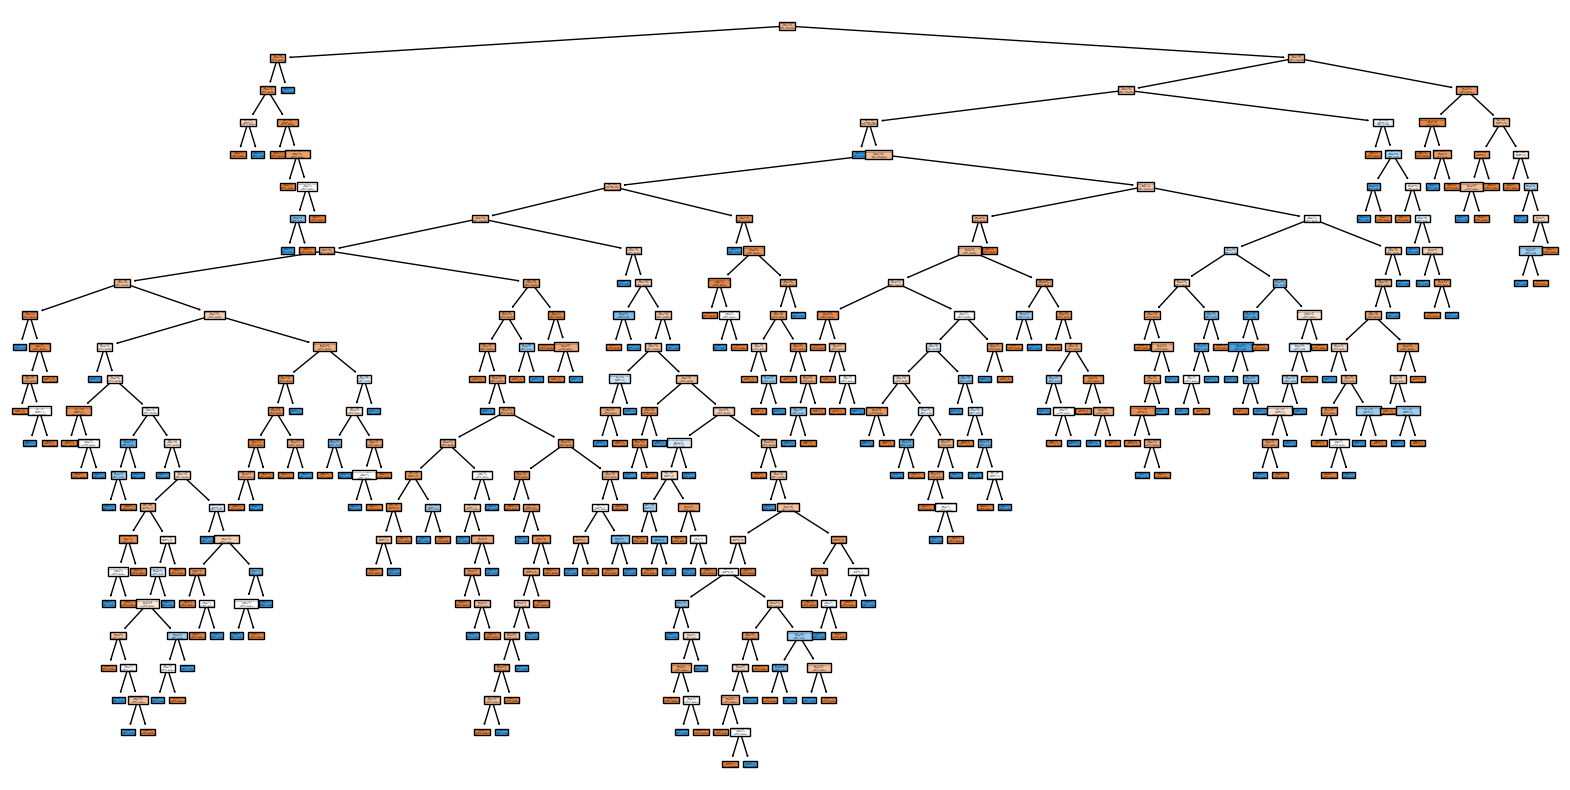

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# Load the dataset
data = pd.read_csv('laptop_buying_data.csv')

# Feature selection
X = data[['Age', 'Income', 'Previous Purchases', 'Gender', 'Occupation', 'Brand Preference']]
# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X)

# Encode categorical features
'''le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
X['Occupation'] = le.fit_transform(X['Occupation'])
X['Brand Preference'] = le.fit_transform(X['Brand Preference'])'''

y = data['Purchase Intention']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the Decision Tree model using Gini impurity (CART)
gini_model = DecisionTreeClassifier(criterion='gini', random_state=42)

# Fit the model
gini_model.fit(X_train, y_train)

# Predict the test data
y_pred = gini_model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(gini_model, filled=True, feature_names=X.columns, class_names=['No Purchase', 'Purchase'])
plt.show()
